# Proyecto de MLOPs | Fase 1

Integrantes del equipo:
- Daniela Avila Luna A01378664





## Información del dataset
El dataset "Absenteeism at work" creado por Andrea Martiniano y Ricardo Ferreira y con ubicación en el repositorio de UC Irvine Machine Learning Repository contiene alrededor de 700 registros sobre los registros de absentismo laboral presentados en una compañía de correos en Brazil de Julio de 2007 a Julio de 2010.

Fuentes:

1. [UC Irvine Machine Learning Repository | Absenteeism at work](https://archive.ics.uci.edu/dataset/445/absenteeism+at+work)

2. [Application of a neuro fuzzy network in prediction of absenteeism at work](https://www.semanticscholar.org/paper/Application-of-a-neuro-fuzzy-network-in-prediction-Martiniano-Ferreira/036b8cbfba37eded57ccfbd2243fd4426bdc73bd#citing-papers)


## Descripción del dataset
El dataset tiene las siguientes columnas numéricas:
1. ID -> Id del individuo
2. Reason for absence (21 categorías estartificadas)
3. Month of absence
4. Day of week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense 
7. Distance from Residence to Work (kilometers)
8. Service time  
9. Age
10. Work load Average/day 
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
18. Pet (number of pet)
17. Weight
18. Height
19. Body mass index
20. Absenteeism time in hours.

### Objetivo del la primera fase

Se busca utilizar el dataset modificado para realizar el proceso inicial de Exploratory Data Analysis (EDA) para enteder el dataset, identificar valores faltantes, etc. Después se realizará una limpieza de datos en caso de tener duplicados y/o identificar y manejar outliers.

Posteriormente se realizará el proceso de Feature Engineering para crear nuevas variables, codificar las variables categóricas, normalizar las variables numéricas y reducir la dimensionalidad.

Finalmente se generarán visualizaciones para corroborar las distribuciones finales, revisar correlaciones entre variables con el target y comprobar el balanceo de clases.

### La variable objetivo
Para nuestro dataset sería la variable de horas de ausentismo laboral ("Absenteeism time in hours")


# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"work_absenteeism_modified.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               746 non-null    object 
 1   Reason for absence               748 non-null    object 
 2   Month of absence                 743 non-null    object 
 3   Day of the week                  746 non-null    object 
 4   Seasons                          750 non-null    object 
 5   Transportation expense           746 non-null    object 
 6   Distance from Residence to Work  743 non-null    object 
 7   Service time                     747 non-null    object 
 8   Age                              749 non-null    object 
 9   Work load Average/day            741 non-null    object 
 10  Hit target                       746 non-null    object 
 11  Disciplinary failure             747 non-null    object 
 12  Education             

In [3]:
# mostrando los primeros renglones
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,mixed_type_col
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0,535
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,...,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0,584
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,...,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0,249
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,...,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0,538
4,11.0,23.0,7.0,65.0,1.0,289.0,36.0,13.0,33.0,239.554,...,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0,85


Casi todas las columns son identificadas como tipo object; sin embargo, al ver los primeros registros se observa que podrían ser interpretados como numéricos

In [4]:
columnas = df.select_dtypes(include="object").columns

for col in columnas:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [5]:
# validando los tipos de datos para las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               744 non-null    float64
 1   Reason for absence               743 non-null    float64
 2   Month of absence                 740 non-null    float64
 3   Day of the week                  744 non-null    float64
 4   Seasons                          749 non-null    float64
 5   Transportation expense           740 non-null    float64
 6   Distance from Residence to Work  739 non-null    float64
 7   Service time                     745 non-null    float64
 8   Age                              747 non-null    float64
 9   Work load Average/day            737 non-null    float64
 10  Hit target                       743 non-null    float64
 11  Disciplinary failure             744 non-null    float64
 12  Education             

In [6]:
# resumen estadístico
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,mixed_type_col
count,744.000000,743.000000,740.000000,744.000000,749.000000,740.000000,739.000000,745.000000,747.000000,737.000000,...,745.000000,739.000000,746.000000,740.000000,736.000000,748.000000,748.000000,747.000000,737.000000,508.000000
mean,19.176075,26.469717,11.129730,6.697581,8.910547,271.871622,41.629229,15.720805,46.409639,346.269479,...,4.374497,3.070365,3.446381,2.741892,6.211957,117.770053,222.669786,40.025435,16.306649,505.935039
std,23.245079,76.449630,56.059237,33.961322,72.931906,885.006680,124.601894,42.272159,134.430477,1007.873886,...,45.113455,33.940174,46.620938,42.792189,64.919573,398.274384,676.036408,151.130709,156.559332,288.477582
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000,1.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000,257.000000
50%,19.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.604000,...,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.500000,25.000000,3.000000,512.000000
75%,28.000000,27.000000,10.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000,747.500000
max,560.000000,1008.000000,855.000000,761.000000,986.000000,21375.000000,2080.000000,800.000000,2190.000000,17244.260000,...,840.000000,828.000000,996.000000,804.000000,974.000000,5890.000000,12070.000000,2449.000000,4032.000000,999.000000


In [7]:
# revisando si hay valores faltantes
df.isnull().sum()

ID                                  10
Reason for absence                  11
Month of absence                    14
Day of the week                     10
Seasons                              5
Transportation expense              14
Distance from Residence to Work     15
Service time                         9
Age                                  7
Work load Average/day               17
Hit target                          11
Disciplinary failure                10
Education                            9
Son                                 15
Social drinker                       8
Social smoker                       14
Pet                                 18
Weight                               6
Height                               6
Body mass index                      7
Absenteeism time in hours           17
mixed_type_col                     246
dtype: int64

In [8]:
# revisando si hay registros duplicados
df.duplicated().sum()

np.int64(0)

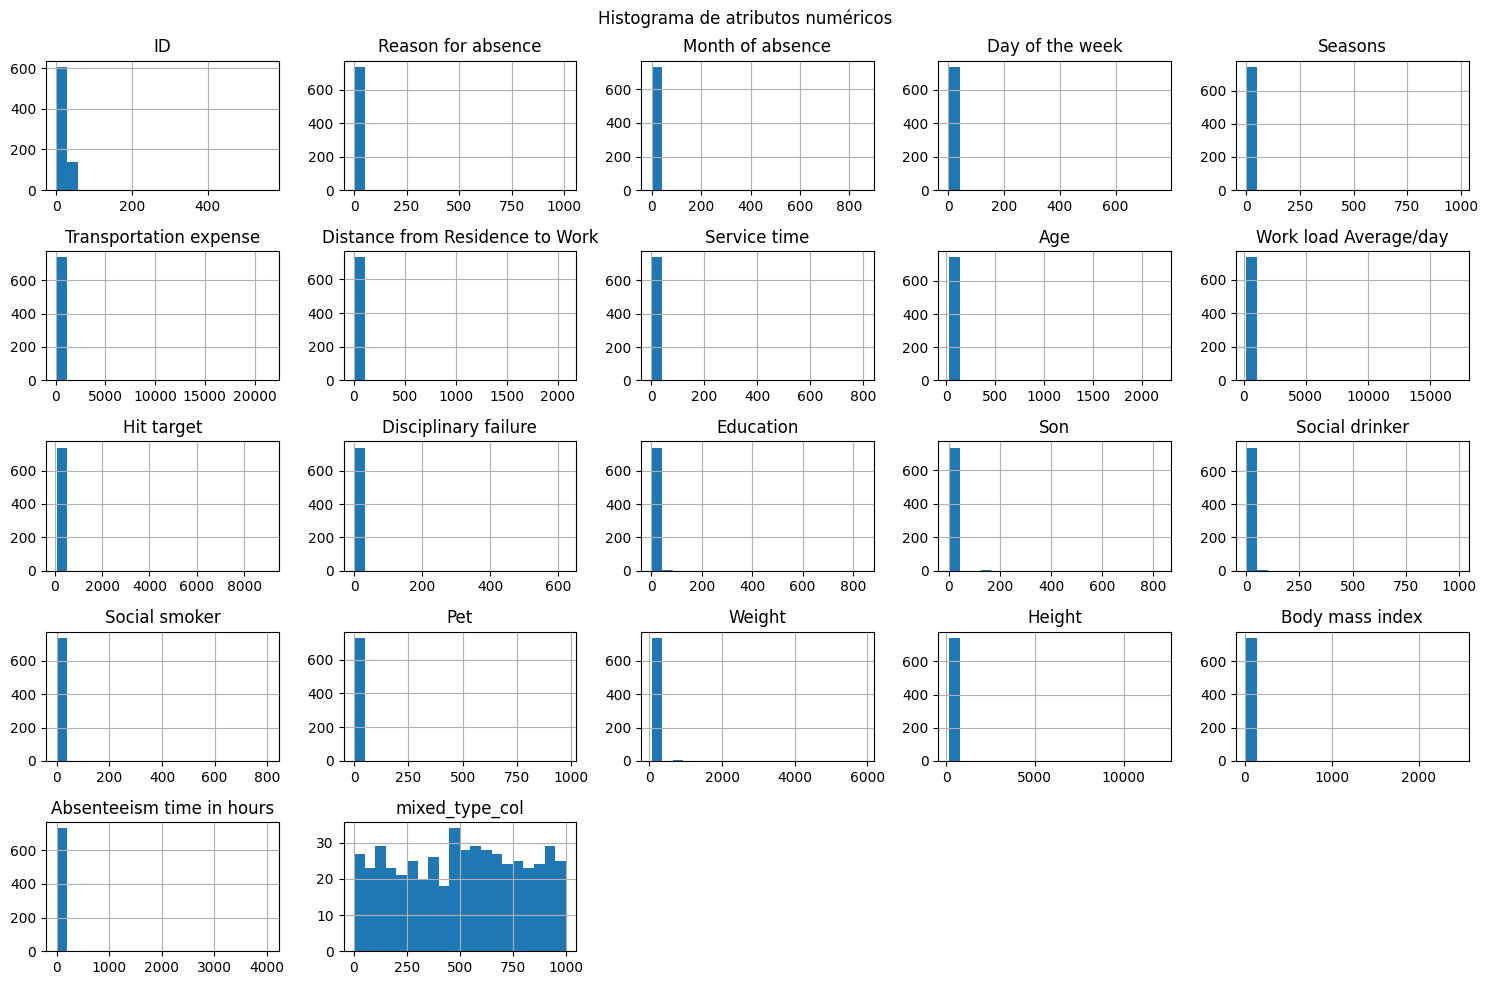

In [9]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograma de atributos numéricos")
plt.tight_layout()
plt.show()

Por como aparecen las distribuciones, se podría asumir que hay outliers en el rango superior. Esto se puede comprobar con boxplots.

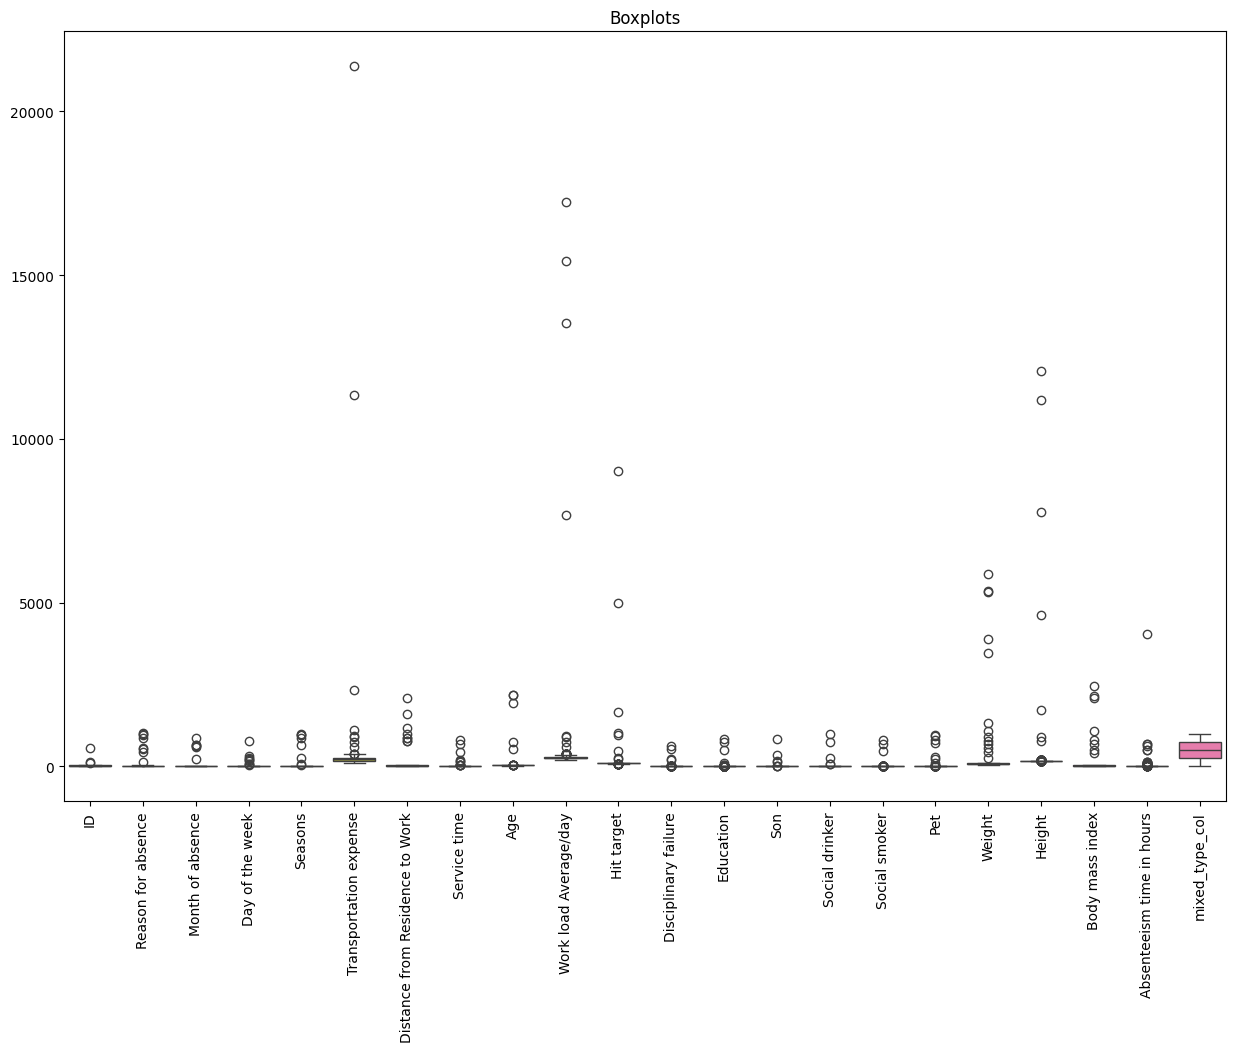

In [10]:
# Boxplot para identificar outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Boxplots")
plt.xticks(rotation=90)
plt.show()

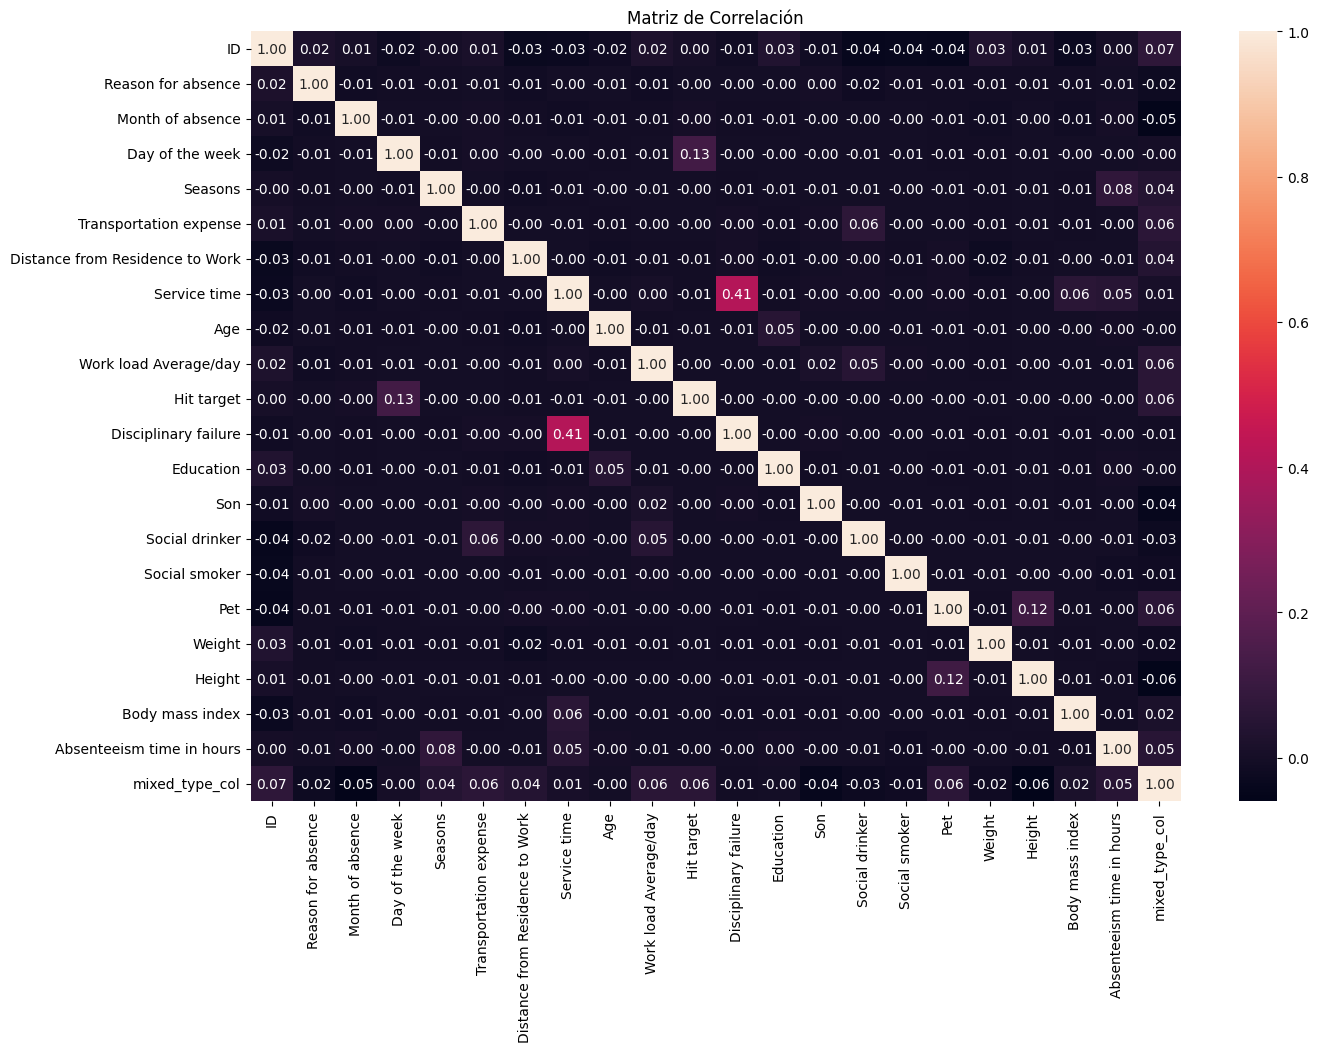

In [11]:
# Realizando heatmap de correlación
plt.figure(figsize=(15, 10))
mat_corr = df.corr()
sns.heatmap(mat_corr, annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Actualmente no vemos una relación entre variables, y se debe al rango de valores que tiene cada variable, por lo que tendremos que hacer limpieza y normalización de las variables.

# Limpieza de datos

Para la limpieza de datos tenemos que isdentificar la proporción de registros faltantes para saber si podemos eliminarlos por completo o si les colocamos un valor basado en una media o moda.

In [12]:
nulos_totales = df.isnull().sum()
nulos_pct = (nulos_totales / len(df)) * 100

nulos_df = pd.DataFrame({"Total nulos:": nulos_totales,
                         "% de nulos": nulos_pct.round(2)})

nulos_df


,Total nulos:,% de nulos
ID,10,1.33
Reason for absence,11,1.46
Month of absence,14,1.86
Day of the week,10,1.33
Seasons,5,0.66
Transportation expense,14,1.86
Distance from Residence to Work,15,1.99
Service time,9,1.19
Age,7,0.93
Work load Average/day,17,2.25


In [13]:
# quitando la columna de mixed_type
df.drop(columns=["ID", "mixed_type_col"], inplace=True)

In [14]:
columnas_no_categoricas = ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target', 'Son',
       'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours']

columnas_categoricas = df.drop(columns=columnas_no_categoricas).columns
columnas_categoricas

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker'],
      dtype='object')

In [15]:
# colocando la media en valores NaN en variables que no son consideradas categoricas

df[columnas_no_categoricas] = df[columnas_no_categoricas].apply(lambda col: col.fillna(col.mean()))

In [16]:
# Función para quitar outliers usando IQR
def quitar_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]


for col in columnas_no_categoricas:
    df = quitar_outliers(df, col)

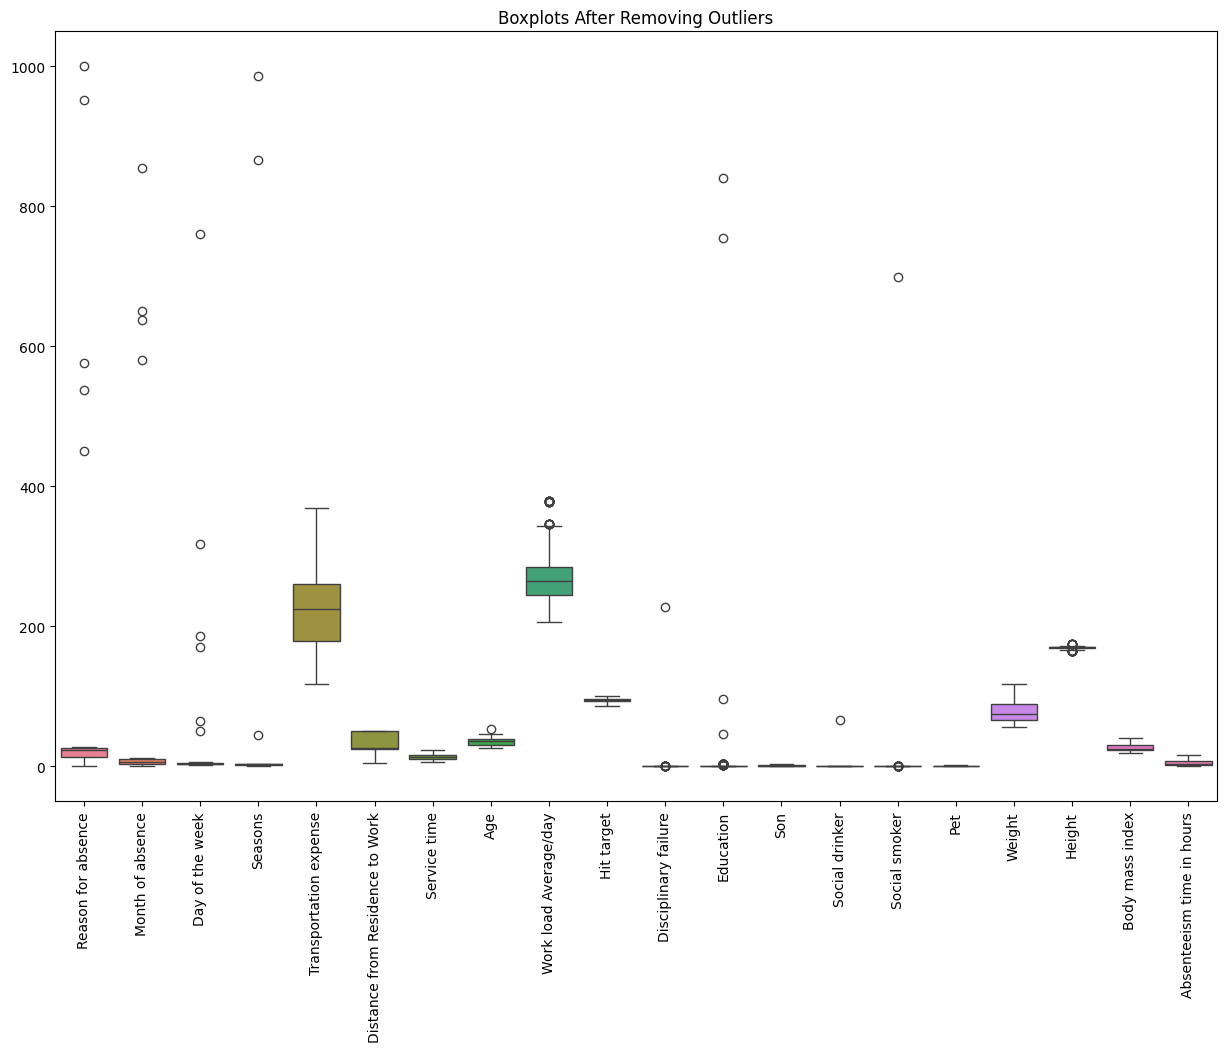

In [17]:
# Nuevo boxplot para la distribucón de las variables sin outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplots After Removing Outliers")
plt.show()

Vemos que en las variables categoricas siguen existiendo oultliers, tenemos que quitarlos manualmente para poder garantizar la calidad de los datos.

In [18]:
print("Lista de variables categoricas:\n", "\n".join(columnas_categoricas))

Lista de variables categoricas:
 Reason for absence
Month of absence
Day of the week
Seasons
Disciplinary failure
Education
Social drinker
Social smoker


In [19]:
df["Reason for absence"].unique()

array([  26.,   23.,    7.,   22.,    1.,   11.,   14.,   21.,   18.,
         24.,   nan,    0.,   19.,   28.,   13.,   27.,  538.,   17.,
          8.,  952.,   12.,   10.,   25.,    6.,   15.,    4.,    3.,
          5.,    9.,  576., 1000.,  450.,   16.])

In [21]:
print("Antes de reemplazar por moda", df["Reason for absence"].unique())
razones_validas = list(range(1, 22))
moda_mes = df[df["Reason for absence"].isin(razones_validas)]["Reason for absence"].mode()[0]

df["Reason for absence"] = df["Reason for absence"].apply(lambda x: moda_mes if x not in razones_validas else x)

print("Después de reemplazar por moda", df["Reason for absence"].unique())

Antes de reemplazar por moda [  26.   23.    7.   22.    1.   11.   14.   21.   18.   24.   nan    0.
   19.   28.   13.   27.  538.   17.    8.  952.   12.   10.   25.    6.
   15.    4.    3.    5.    9.  576. 1000.  450.   16.]
Después de reemplazar por moda [13.  7.  1. 11. 14. 21. 18. 19. 17.  8. 12. 10.  6. 15.  4.  3.  5.  9.
 16.]


In [22]:
print("Antes de reemplazar por moda", df["Seasons"].unique())
temp_validas = list(range(1, 5))
moda_mes = df[df["Seasons"].isin(temp_validas)]["Seasons"].mode()[0]

df["Seasons"] = df["Seasons"].apply(lambda x: moda_mes if x not in temp_validas else x)

print("Después de reemplazar por moda", df["Seasons"].unique())


Antes de reemplazar por moda [  1. 866.   4. 986.   2.  nan   3.  45.]
Después de reemplazar por moda [1. 4. 2. 3.]


In [23]:
print("Antes de reemplazar por moda", df["Month of absence"].unique())
meses_validos = list(range(1, 13))
moda_mes = df[df["Month of absence"].isin(meses_validos)]["Month of absence"].mode()[0]

df["Month of absence"] = df["Month of absence"].apply(lambda x: moda_mes if x not in meses_validos else x)

print("Después de reemplazar por moda", df["Month of absence"].unique())

Antes de reemplazar por moda [  7.   8.   9.  10.  nan  11.  12.   1.   2.   3.   4.   5.   6. 650.
 855. 580. 638.   0.]
Después de reemplazar por moda [ 7.  8.  9. 10.  3. 11. 12.  1.  2.  4.  5.  6.]


In [24]:
df["Day of the week"].unique()

array([  3.,   4.,   5.,  65.,  nan,   6.,   2., 318.,  50., 761., 171.,
       186.])

In [25]:
print("Antes de reemplazar por moda", df["Day of the week"].unique())
dias_validos = list(range(1, 8))
moda_mes = df[df["Day of the week"].isin(dias_validos)]["Day of the week"].mode()[0]

df["Day of the week"] = df["Day of the week"].apply(lambda x: moda_mes if x not in dias_validos else x)

print("Después de reemplazar por moda", df["Day of the week"].unique())

Antes de reemplazar por moda [  3.   4.   5.  65.  nan   6.   2. 318.  50. 761. 171. 186.]
Después de reemplazar por moda [3. 4. 5. 6. 2.]


In [26]:
df["Education"].unique()

array([  1.,   3.,  46.,   2.,  97., 840.,  nan, 755.])

In [27]:
print("Antes de reemplazar por moda", df["Education"].unique())
edu_validos = list(range(1, 5))
moda_mes = df[df["Education"].isin(edu_validos)]["Education"].mode()[0]

df["Education"] = df["Education"].apply(lambda x: moda_mes if x not in edu_validos else x)

print("Después de reemplazar por moda", df["Education"].unique())

Antes de reemplazar por moda [  1.   3.  46.   2.  97. 840.  nan 755.]
Después de reemplazar por moda [1. 3. 2.]


In [28]:
print("Disciplinary failure:", df["Disciplinary failure"].unique())
print("Social drinker:", df["Social drinker"].unique())
print("Social smoker:", df["Social smoker"].unique())

Disciplinary failure: [  0.  nan   1. 228.]
Social drinker: [ 1.  0. nan 66.]
Social smoker: [  0.   1.  nan 699.]


In [29]:
valores_validos = list(range(0, 2))
moda_disp = df[df["Disciplinary failure"].isin(edu_validos)]["Disciplinary failure"].mode()[0]
moda_drink = df[df["Social drinker"].isin(edu_validos)]["Social drinker"].mode()[0]
moda_smoke = df[df["Social smoker"].isin(edu_validos)]["Social smoker"].mode()[0]

df["Disciplinary failure"] = df["Disciplinary failure"].apply(lambda x: moda_disp if x not in valores_validos else x)
df["Social drinker"] = df["Social drinker"].apply(lambda x: moda_disp if x not in valores_validos else x)
df["Social smoker"] = df["Social smoker"].apply(lambda x: moda_disp if x not in valores_validos else x)

print("Después de reemplazo por moda")
print("Disciplinary failure:", df["Disciplinary failure"].unique())
print("Social drinker:", df["Social drinker"].unique())
print("Social smoker:", df["Social smoker"].unique())

Después de reemplazo por moda
Disciplinary failure: [0. 1.]
Social drinker: [1. 0.]
Social smoker: [0. 1.]


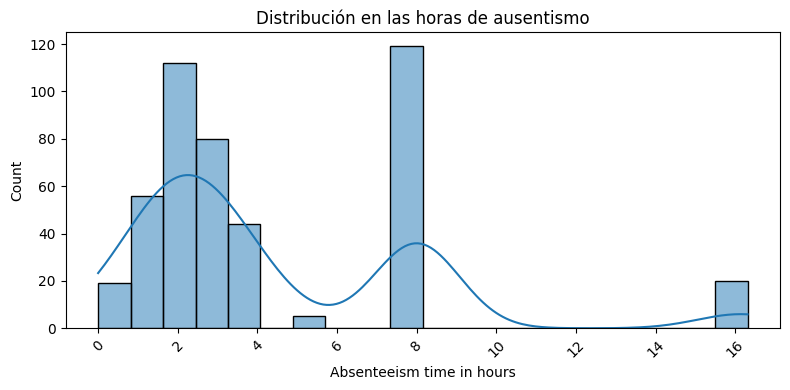

In [30]:
# Distribución de horas de ausentismo
plt.figure(figsize=(8, 4))
sns.histplot(df['Absenteeism time in hours'], kde=True, bins=20)
plt.xticks(rotation=45)
plt.title("Distribución en las horas de ausentismo")
plt.tight_layout()
plt.show()

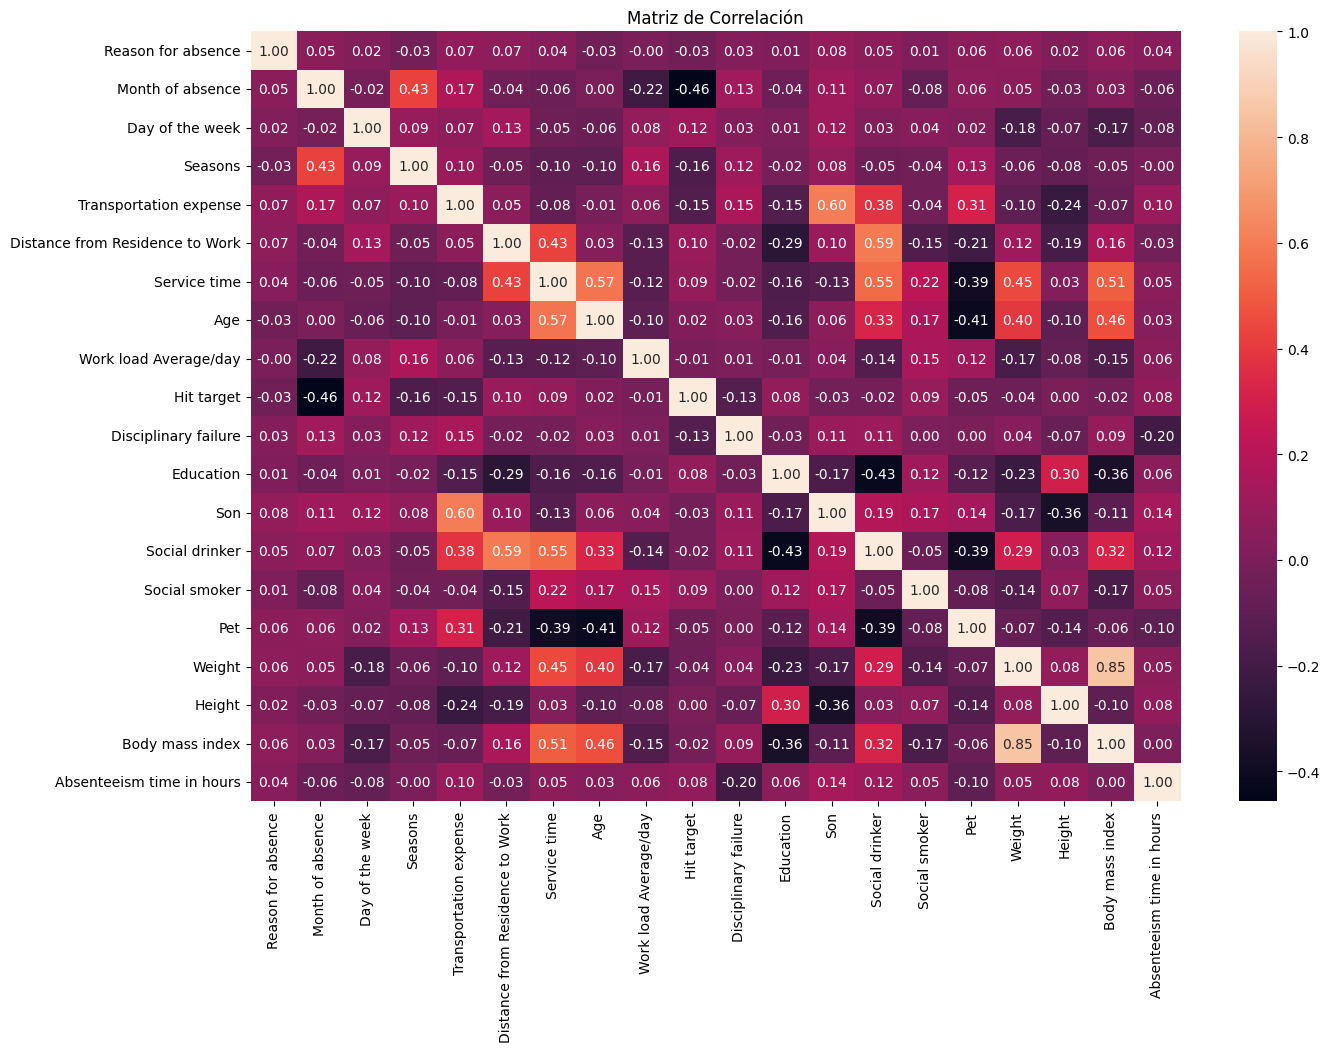

In [31]:
# Realizando heatmap de correlación
plt.figure(figsize=(15, 10))
mat_corr = df.corr()
sns.heatmap(mat_corr, annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Ahora podemos ver una correlación más clara entre algunas variables como lo son:
- "Service time" y "Age"
- "Month of absence" y "Season"
- "Son" y "Transportation expense"
- "Service time" y "body mass index"
- "Age" y "Weight"
- "Age" y "body mass index"
- "social drinker" y "service time"

# Feature engineering

Procedemos a realizar la creación de nuevas variables que faciliten nuestro análisis

In [32]:
df['Total_dependientes'] = df['Son'] + df['Pet']

Debido a que los rangos de cada variable varía mucho, podemos normalizar las variables con un MixMaxScaler y estandarizamos con StandardScaler()

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[columnas_no_categoricas] = scaler.fit_transform(df[columnas_no_categoricas])

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[columnas_no_categoricas] = scaler.fit_transform(df[columnas_no_categoricas])

Podemos eliminar variables con muy poca varianza

In [35]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01) 
df = pd.DataFrame(selector.fit_transform(df), columns=df.columns[selector.get_support()])

Podemos reducir dimensionalidad usando Principal Componen Analisys (PCA)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)

Realizamos una nueva matriz de correlación

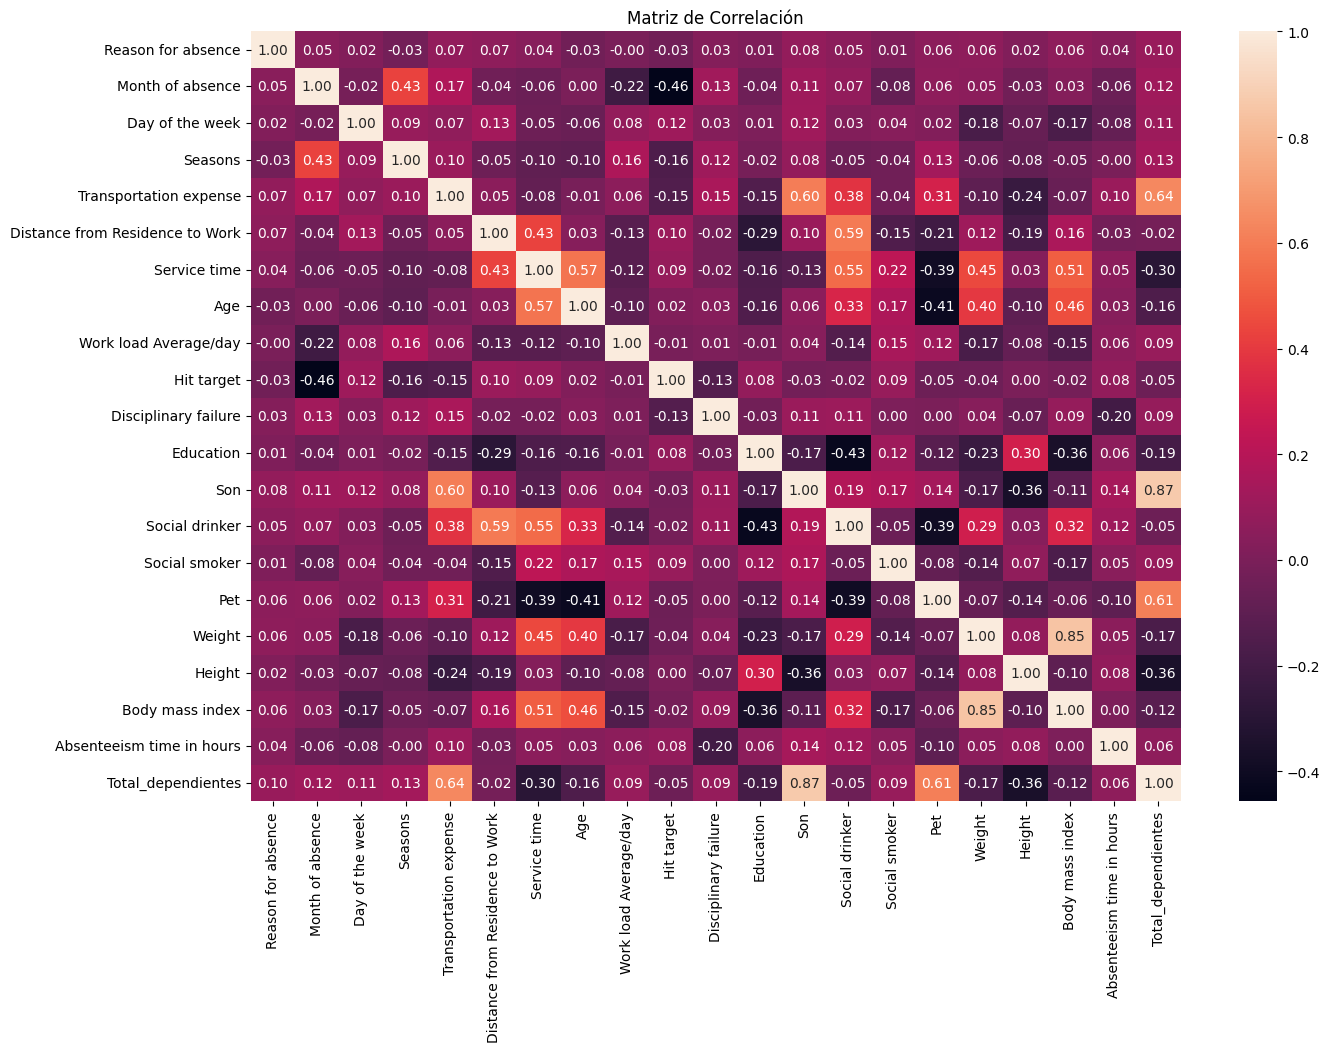

In [37]:
# Realizando heatmap de correlación
plt.figure(figsize=(15, 10))
mat_corr = df.corr()
sns.heatmap(mat_corr, annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

Vamos a quitar las variables que sobrepasen el 0.9 de correlación

In [38]:
corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
df.drop(columns=to_drop, inplace=True)

Hay que validar si la variable objetivo se encuentra balanceada

In [39]:
df['Absenteeism time in hours'].value_counts()

Absenteeism time in hours
 0.984998    119
-0.650435    112
-0.377863     80
-0.923007     56
-0.105291     44
-1.195579     19
 3.165575     11
 3.249158      9
 0.167281      5
Name: count, dtype: int64

In [40]:
print(f"Tamaño final del dataset: {df.shape}")

Tamaño final del dataset: (455, 21)
